<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;"><font face="times" size=4>Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase</font>
</td>
</tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/docs/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;"><font face="times" size=4>2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font>
</td>
</tr>
</table>

# Potencial Eléctrico

---

In [1]:
# --------------------------------
#
# En edición.
#
# --------------------------------

**Objetivos**

  - Repasar el cálculo de potencial eléctrico con cargas puntuales.
  - Analizar equipotenciales de diversas configuraciones de cargas puntuales.
  - Obtener el campo eléctrico a partir del potencial eléctrico.

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Definición de una función para potencial eléctrico con cargas puntuales](#toc1_)    
- 2. [Dipolo eléctrico](#toc2_)    
- 3. [Dos cargas iguales](#toc3_)    
- 4. [Ejercicio 1:](#toc4_)    
- 5. [¿Qué más?](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

# ------------------------------------
# Lo siguiente es necesario para que funcione en Google Colab.
try:
  from libem import equipotencialesPuntuales
except:
  # No descarga los archivos (aunque sí descarga .git)
  !git clone -n https://github.com/frautn/F2-electromagnetismo.git --depth 1
  !cd F2-electromagnetismo;git checkout HEAD modulos/libem.py
  sys.path.insert(0, 'F2-electromagnetismo/modulos')
  from libem import equipotencialesPuntuales

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()
# Fin Google colab.
# ------------------------------------

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget


## 1. <a id='toc1_'></a>[Definición de una función para potencial eléctrico con cargas puntuales](#toc0_)

Si consideramos que el potencial vale cero en el infinito, entonces el potencial eléctrico en una posición $\vec{\text{x}}$ en presencia de una carga puntual $q_0$ ubicada en la posición $\vec{\text{x}}_0$, puede escribirse como:
$$
V(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|}\, , \tag{1}
$$
donde $|\vec{\text{r}}|$ es la distancia entre la posición de la partícula cargada ($\vec{\text{x}}_0$) y la posición donde se quiere determinar el valor del potencial eléctrico ($\vec{\text{x}}$).

En presencia de más de una carga eléctrica puntual, el potencial se calcula como la suma de los potenciales de cada carga:
$$
V(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|}\, , \tag{2}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $|\vec{\text{r}}_i|$ es la distancia entre entre la posición donde se quiere determinar el valor del potencial eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$), es decir:
$$
|\vec{\text{r}}_i| = \sqrt{(x-x_i)^2 + (y-y_i)^2 + (z-z_i)^2} ~ . \tag{3}
$$

A continuación se define una función que calcula este potencial eléctrico, siguiendo la misma metodología que en el cuaderno 01.

In [3]:
def V(x,y,z,Q):
    """Calcula potencial eléctrico en V.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    V = 0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(1/2)
        V = V + k * qi[0] / r

    return V

Calculemos el potencial de una sola partícula en alguna posición para comprobar que está funcionando correctamente.

In [4]:
Q = [
    [5E-9,0,0,0],
]

# Potencial a 1 metro de distancia de q.
V(1,0,0,Q)

45.000

Así podemos ver las equipotenciales de este problema:

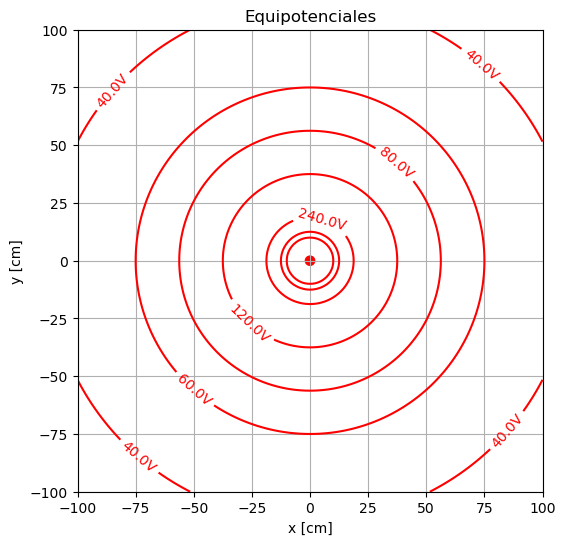

In [5]:
# Se eligen cuáles equipotenciales mostrar en una lista. 
levels = [40, 60, 80, 120, 240, 360, 450]

equipotencialesPuntuales(Q, V, levels=levels)

También podemos ver las líneas de campo.

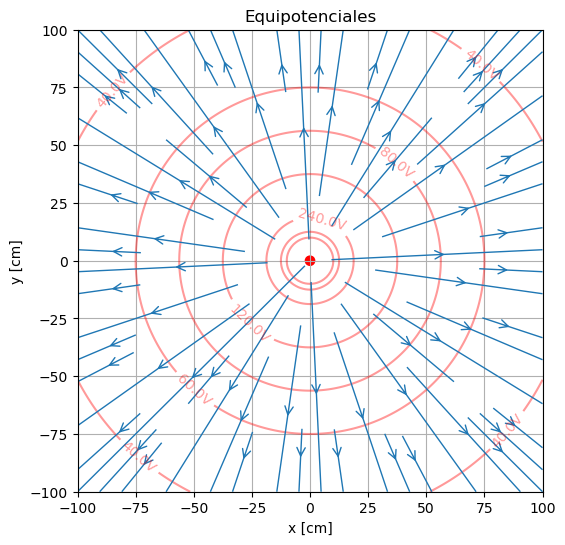

In [6]:
equipotencialesPuntuales(Q, V, levels=levels, EF=True)

## 2. <a id='toc2_'></a>[Dipolo eléctrico](#toc0_)

Se define la lista de cargas correspondiente, el resto de los pasos no cambia.

In [7]:
Q = [
    [-1E-9,-0.3,0,0],
    [1E-9,0.3,0,0],
]

Cálculo del potencial en diferentes posiciones.

In [8]:
print("V(0,0,0)  = ", V(0,0,0,Q))
print("V(0.5,0,0)  = ", V(0.5,0,0,Q))
print("V(-0.5,0,0)  = ", V(-0.5,0,0,Q))
print("V(0.5,0.5,0)  = ", V(0.5,0.5,0,Q))
print("V(0,0,0.1)  = ", V(0,0,0.1,Q))
print("V(0.2,0,0.2)  = ", V(0.2,0,0.2,Q))

V(0,0,0)  =  0.0
V(0.5,0,0)  =  33.75
V(-0.5,0,0)  =  -33.75
V(0.5,0.5,0)  =  7.172599515877426
V(0,0,0.1)  =  0.0
V(0.2,0,0.2)  =  23.53664315906155


Veamos las equipotenciales.

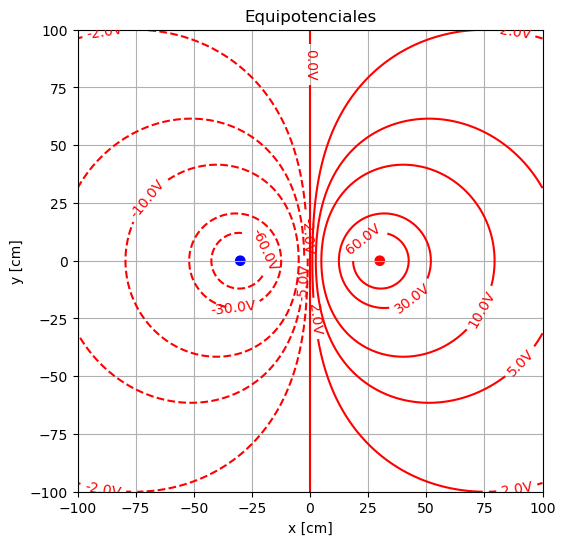

In [9]:
# Se eligen cuáles equipotenciales mostrar en una lista. 
levels = [-60, -30, -10, -5, -2, 0, 2, 5, 10, 30, 60]

equipotencialesPuntuales(Q, V, levels=levels)

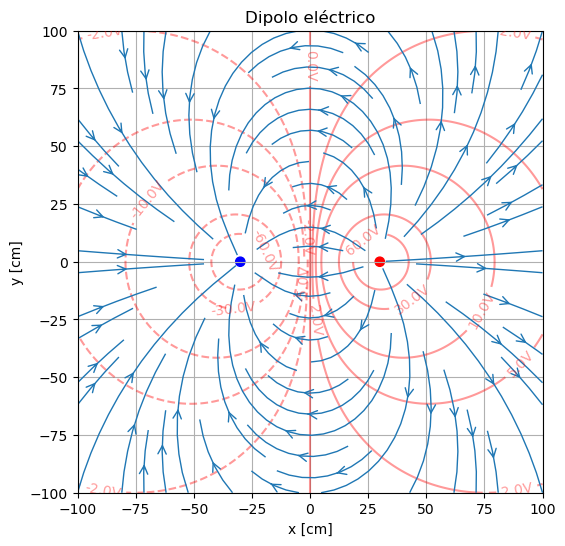

In [10]:
equipotencialesPuntuales(Q, V, levels=levels, EF=True, titulo='Dipolo eléctrico')


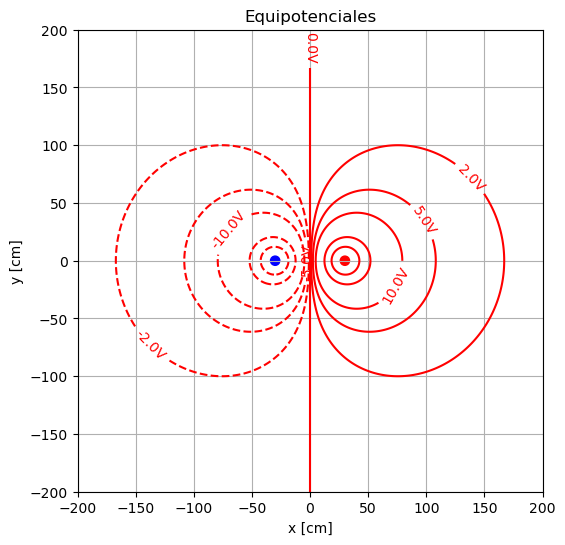

In [11]:
# Visto desde más lejos

equipotencialesPuntuales(Q, V, levels=levels, dim=200)

## 3. <a id='toc3_'></a>[Dos cargas iguales](#toc0_)

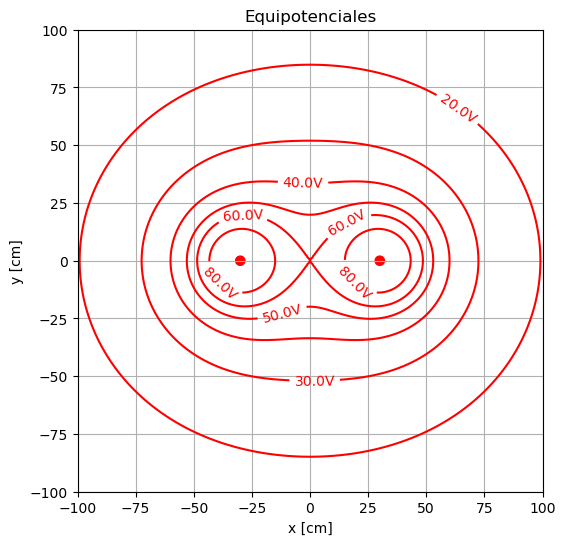

In [12]:
Q = [
    [1E-9,-0.3,0,0],
    [1E-9,0.3,0,0],
]

levels = [20, 30, 40, 50, 60 ,80]

equipotencialesPuntuales(Q, V, levels=levels)

Visto desde lejos.

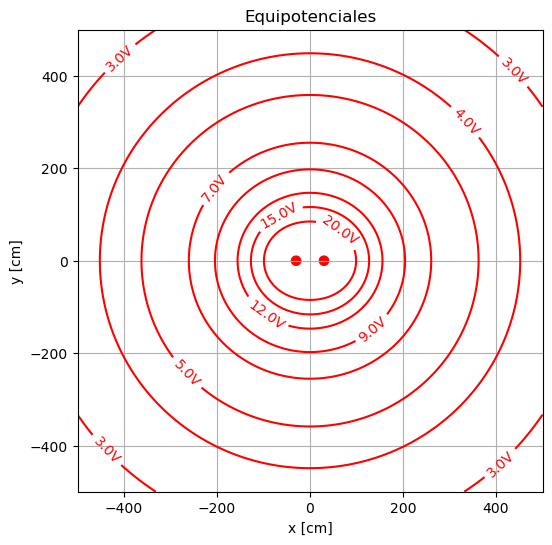

In [13]:
levels = [3,4, 5, 7, 9, 12, 15, 20]
equipotencialesPuntuales(Q, V, levels=levels, dim=500)

## 4. <a id='toc4_'></a>[Ejercicio 1:](#toc0_)

En los vértices de un cuadrado de 1 m se ubican las siguientes cargas: $q_1 = 10\,\text{nC}$, $q_2 = -20\,\text{nC}$, $q_3 = 30\,\text{nC}$ y $q_4 = 20\,\text{nC}$.  
  1. Calcular el potencial en el centro del cuadrado.
  1. Graficar las equipotenciales.

In [14]:
# 1. Calcular V



In [15]:
# 2. Gráfico de equipotenciales. 

## 5. <a id='toc5_'></a>[¿Qué más?](#toc0_)

In [56]:

# Formatter para agregar V a las etiquetas de las equipotenciales.
def fmtV(x):
    return f"{x}V"


# Esta función puede mejorarse muchísimo, sobre todo respecto a las escalas y unidades.
def equipotencialesPuntuales2(Q, V, dim = 100, levels = 10, figsize=(6,6), titulo='Equipotenciales',
                EF = False, density=0.75, dq=0.02, **params):
    """
    Grafica equipotenciales generadas por la distribución de cargas Q, con voltajes calculados 
    usando la función V.

    Parameters
    ----------
    Q : list
        Q = [
            [q1,x1,y1,z1],
            [q2,x2,y2,z2],
            ...
            [qN,xN,yN,zN]
        ]
    V : function
        La función que calcula los voltajes.
    dim : integer (opcional)
        Valores máximos para x,y en cm.
    levels : list
        Los valores de voltaje de las equipotenciales que se quiere graficar.

    *Además de los parámetros de matplotlib y quiver, por ejemplo:*
    length : float
    figsize : tuple
    title : string
    """

    if 'x' in params:
        x = params.get('x', 0)
        y = np.arange(-dim, dim+1)
        z = np.arange(-dim, dim+1)
        X, Y = np.meshgrid(y, z)
        Z = X*0 + x
    if 'y' in params:
        y = params.get('y', 0)
        y = np.arange(-dim, dim+1)
        z = np.arange(-dim, dim+1)
        X, Y = np.meshgrid(y, z)
        Z = X*0 + x
    else:
        z = params.get('z', 0)
        print(type(z))
        x = np.arange(-dim, dim+1)
        y = np.arange(-dim, dim+1)
        X, Y = np.meshgrid(x, y)
        Z = X*0 + z
        Vmat = V(X/100,Y/100,Z,Q)  # Convertir X, Y a metro.
        

    # Set the labels for the plane to be displayed.
    if isinstance(x, float) or isinstance(x, int):
        xlabel = 'y [cm]'
        ylabel = 'z [cm]'
    elif isinstance(y, float) or isinstance(y, int):
        xlabel = 'x [cm]'
        ylabel = 'z [cm]'
    elif isinstance(z, float) or isinstance(z, int):
        xlabel = 'x [cm]'
        ylabel = 'y [cm]'

     


    fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
    ax.set_title(titulo)
    for carga in Q:
        q, xq, yq, zq = carga
        if q>0:
            color = 'red'
        else:
            color = 'blue'
        circ = plt.Circle((xq*100,yq*100), dq*dim, color=color)
        ax.add_patch(circ)

    if EF:
        CS2 = ax.contour(X, Y, Vmat, levels = levels, colors = 'red', alpha=0.4)
        E = np.gradient(-1*Vmat)
        ax.streamplot(X, Y, E[1], E[0], linewidth=1, cmap=plt.cm.inferno,
              density=density, arrowstyle='->', arrowsize=1.5)
    else:
        CS2 = ax.contour(X, Y, Vmat, levels = levels, colors = 'red', alpha=1)
    
    ax.clabel(CS2, inline=True, fmt=fmtV, fontsize=10)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

    # return Vmat

In [37]:
z = 4
x = np.arange(-100, 100+1)
y = np.arange(-100, 100+1)
X, Y = np.meshgrid(x, y)
Z = X*0 + z
Z


array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]])

In [47]:
x = 1
if isinstance(x, float) or isinstance(x, int):
    print('ok') 

ok


<class 'float'>


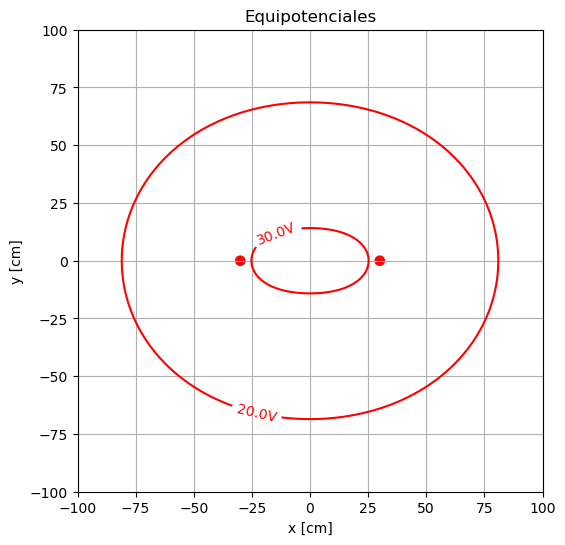

In [59]:
Q = [
    [1E-9,-0.3,0,0],
    [1E-9,0.3,0,0],
]

levels = [20, 30, 40, 50, 60 ,80]

equipotencialesPuntuales2(Q, V, levels=levels, z=0.5)

In [16]:
# TO-DO

# Cambiar el valor de Z.
# Posibilidad de rotar el plano. ¿Modificar la función o rotar las cargas?